# Random Numbers - Challenge
## Goals
Configure the state of three qubits to produce (roughly) this outcome distribution:
- $\ket{001}$: 0.375
- $\ket{011}$: 0.375
- $\ket{101}$: 0.125
- $\ket{111}$: 0.125

### Notes:
since the probabilities of all of the 8 possible states must add up to 1 we know this additional information:
<br>
<br>
$\ket{000}$: 0
<br>
$\ket{010}$: 0
<br>
$\ket{100}$: 0
<br>
$\ket{110}$: 0
<br>
<br>
Also the AerSimulator will run 1024 shots. So a perfect run would look like:
<br>
<br>
$\ket{001}$: 384
<br>
$\ket{011}$: 384
<br>
$\ket{101}$: 128
<br>
$\ket{111}$: 128

#### Attempt #1:
The first qubit must always be measured as 1, so we apply an X gate.
<br>
The second qubit can be a 0 or 1, so we apply an H gate.
<br>
The third qubit can be a 0 or 1, so we apply an H gate.
<br>
<br>
Results:
<br>
We got the correct outputs however, the probability distribution is equal across the four possible states. 

#### Attempt #2:
The third qubit needs to have a higher probability of being 0 than 1.
<br>
The probability the third qubit is measured as 0 is 75%.
<br>
The probability the third qubit is measured as 1 is 25%.
<br>
Let's apply an $R_Y$ gate with rotation of $-\frac{\pi}{4}$ radians to bring the vector halfway between $\ket{+}$ and $\ket{0}$
<br>
<br>
Results:
- Definitely on the right track here, our results improved but the probability where the third qubit is 0 is now too high.

#### Attempt #3:
Let's apply an $R_Y$ gate with rotation of $-\frac{\pi}{8}$ to bring the vector halfway back to $\ket{1}$
<br>
<br>
Results:
- Much better results, but I feel like we can do better.
- The probability that the third qubit is 1 is now just a little too high for the results we are looking for.

#### Attempt #4:
Let's apply an $R_Y$ gate with rotation of $-\frac{\pi}{6}$ to bring the vector halfway back to $\ket{0}$
<br>
<br>
Results:
- Bingo! I think we have found a good solution. 
- Due to the proababilistic nature of qubits, we will not get the perfect answer but this solution gets us right there!

In [319]:
from qiskit import *
from qiskit_aer import * 
from qiskit.visualization import plot_histogram, array_to_latex, plot_bloch_multivector
from math import pi
%matplotlib inline

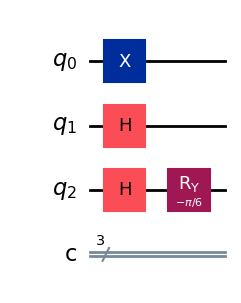

In [320]:
circuit = QuantumCircuit(3, 3)
circuit.x(0)
circuit.h(1)
circuit.h(2)
circuit.ry(-pi/6, 2)
circuit.draw(output='mpl');

In [321]:
simulator = StatevectorSimulator()
sim_result = simulator.run(circuit).result()
statevector = sim_result.get_statevector()
array_to_latex(statevector, prefix="\\text{statevector = }\n")

<IPython.core.display.Latex object>

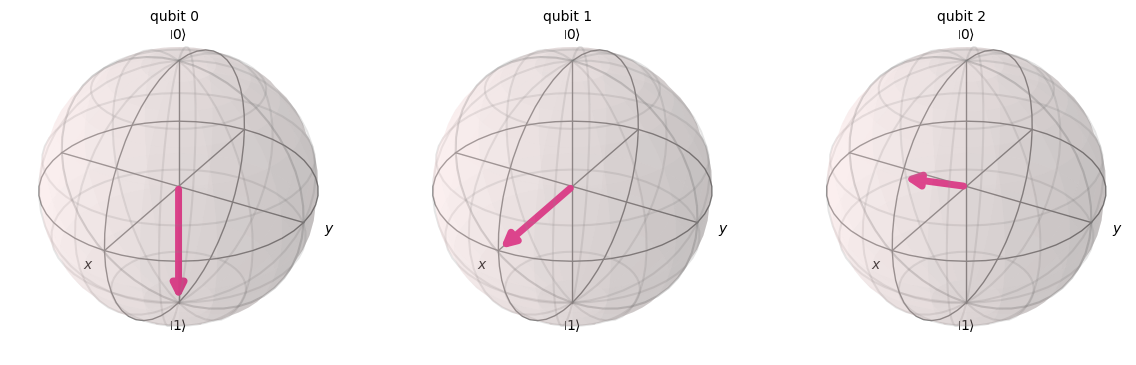

In [322]:
plot_bloch_multivector(statevector);

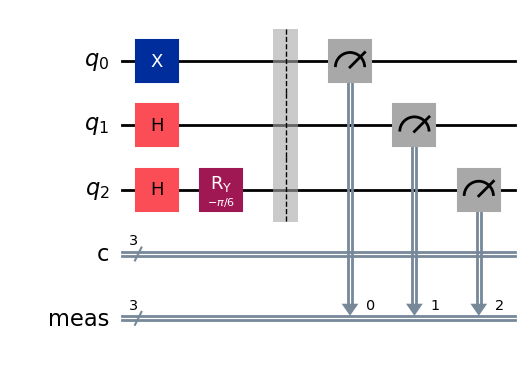

In [323]:
circuit.measure_all()
circuit.draw(output='mpl');


{'001 000': 392, '111 000': 125, '011 000': 375, '101 000': 132}


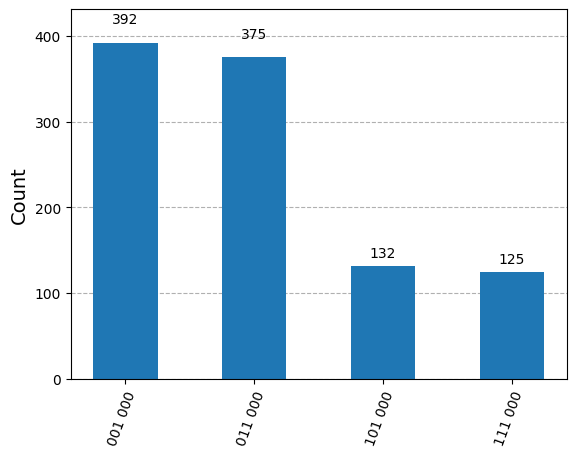

In [324]:
simulator = AerSimulator()
compiled_circuit = transpile(circuit, simulator)
sim_result = simulator.run(compiled_circuit).result()
plot_histogram(sim_result.get_counts())
print(sim_result.get_counts())